In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(w, b, x):
    if w.shape != x.shape:
        print("Wrong shapes: " + str(w.shape()) + ", " + str(x.shape()))
    return np.dot(w, x) + b

In [3]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
features = df[['LotArea']].to_numpy(dtype=float)
feature_count = len(features[0])

In [5]:
# data normalization
def normalize_feature(rows, index):
    # calc min and max
    min = rows[0][i]
    max = rows[0][i]
    for row in rows:
        if row[i] < min:
            min = row[i]
        elif row[i] > max:
            max = row[i]
            
    # compute new values
    for row in rows:
        row[i] = float(row[i] - min) / (max - min)

for i in range(len(features[0])):
    normalize_feature(features, i)

In [6]:
#features are LotArea, YearBuilt, OverallCond
def cost(w, b):
    total_cost = 0
    
    for index, row in df.iterrows():
        total_cost += (f(w, b, features[index]) - row['SalePrice']) ** 2
    
    return total_cost / (2 * len(df.index))

In [7]:
cost(np.zeros(feature_count), 0)

19519633853.882877

In [8]:
def gradient_desc():
    w = np.zeros(feature_count, dtype=float)
    b = 0
    learning_rate = 0.05
    row_count = len(df.index)
    
    for i in range(0, 500):
        
        w_derivs = np.zeros(feature_count, dtype=float)
        b_deriv = 0
        
        for index, row in df.iterrows():
            base_deriv = f(w, b, features[index]) - row['SalePrice']
            
            deriv = features[index] * base_deriv
            w_derivs += deriv
            
            b_deriv += (f(w, b, features[index]) - row['SalePrice'])
            
        w_derivs = np.multiply(w_derivs, learning_rate / row_count)
        w = np.subtract(w, w_derivs)
        
        #w = w - learning_rate * (w_deriv / row_count)
        b = b - learning_rate * (b_deriv / row_count)
    
    return (w, b)

In [9]:
w,b = gradient_desc()

In [10]:
b

179619.6242761578

In [11]:
w

array([31122.4404151])

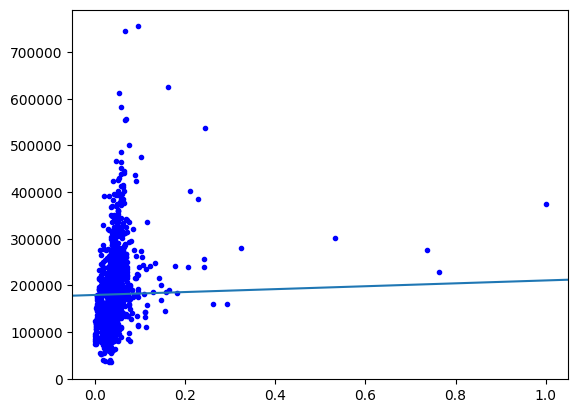

In [12]:
plt.plot(features[:,0], df['SalePrice'], 'b.')
plt.axline((0, b), slope=int(w[0]))

In [13]:
cost(w, b) / 100000

31240.354909094138

In [15]:
f(w, b, np.array([0.6]))

198293.08852521548